# Megat-PIDAO
## Understanding usage of Proportional Integral and Derviate Controller for Deep Learning Training Optimization

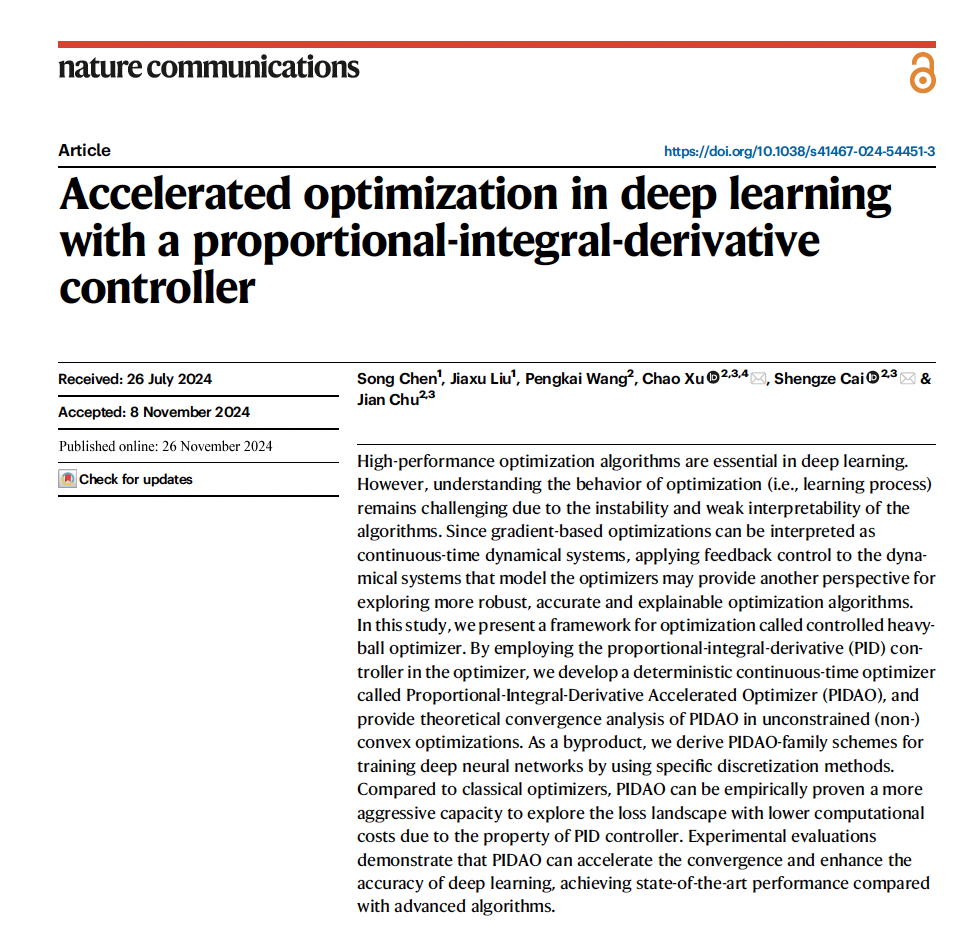

Today, we will try to understand and implement the paper above. The paper can be downloaded here
https://www.nature.com/articles/s41467-024-54451-3

First, let's extract the abstract of the paper:

>**High-performance optimization algorithms are essential in deep learning. However, understanding the behavior of optimization (i.e., learning process) remains challenging due to the instability and weak interpretability of the algorithms. Since gradient-based optimizations can be interpreted as continuous-time dynamical systems, applying feedback control to the dynamical systems that model the optimizers may provide another perspective for exploring more robust, accurate, and explainable optimization algorithms.
In this study, we present a framework for optimization called the controlled heavy-ball optimizer. By employing the proportional-integral-derivative (PID) controller in the optimizer, we develop a deterministic continuous-time optimizer called Proportional-Integral-Derivative Accelerated Optimizer (PIDAO) and provide theoretical convergence analysis of PIDAO in unconstrained (non-)convex optimizations. As a byproduct, we derive PIDAO-family schemes for training deep neural networks using specific discretization methods. Compared to classical optimizers, PIDAO empirically demonstrates a more aggressive capacity to explore the loss landscape with lower computational costs due to the properties of the PID controller. Experimental evaluations demonstrate that PIDAO can accelerate convergence and enhance the accuracy of deep learning, achieving state-of-the-art performance compared to advanced algorithms.**
>


Ok, that's a lot of buzz words. It is very hard to understand it. But let's do this sections by sections
>**High-performance optimization algorithms are essential in deep learning. However, understanding the behavior of optimization (i.e., learning process) remains challenging due to the instability and weak interpretability of the algorithms**

This part here is the main issues we have with current method. For all of you who are not familiar with optimization techniques used in the deep learning, let me introduce you to few of thems. We have the famous one, which is Adam (Adapative Moment Estimation), the first one that I learn, SGD (Stochastic Gradient Descent), Adagrad (Adaptive Gradient Algorithm) and RMSProp (Root mean square propagation). All of these traditional optimizer can be called through pytorch optimizer. The paper states that these techniques have a lot of issues, among them is, instability and weak interpretability. 

>**Since gradient-based optimizations can be interpreted as continuous-time dynamical systems, applying feedback control to the dynamical systems that model the optimizers may provide another perspective for exploring more robust, accurate, and explainable optimization algorithms**
>

So, in this section, they're proposing us to use a feedback control in the dynamic systems (the optimizer) to allows us to interprete the optimization process better. This is something that I can understasnd. As process engineer, we have learned about dynamic systems (which is our refinery/process plant) and the feedback control needed to sustain it's operation. And the feedback system that we use in our plant is PID control (Proportional Integral and Derivative Control). That's why in the next section they propose:

>**In this study, we present a framework for optimization called the controlled heavy-ball optimizer. By employing the proportional-integral-derivative (PID) controller in the optimizer, we develop a deterministic continuous-time optimizer called Proportional-Integral-Derivative Accelerated Optimizer (PIDAO) and provide theoretical convergence analysis of PIDAO in unconstrained (non-)convex optimizations**
>

The keyword here is the word deterministic and discrete. By using PIDAO, the optimizer becomes highly interpretable. So, it becomes easily explained and easier to understand leading to better perfromance in non-convex optimization. Non-convex means that the loss landscape is not like the slope of a hill. It has sudden peaks and slopes leading to harder optimization by traditional optimizer.

>**As a byproduct, we derive PIDAO-family schemes for training deep neural networks using specific discretization methods. Compared to classical optimizers, PIDAO empirically demonstrates a more aggressive capacity to explore the loss landscape with lower computational costs due to the properties of the PID controller. Experimental evaluations demonstrate that PIDAO can accelerate convergence and enhance the accuracy of deep learning, achieving state-of-the-art performance compared to advanced algorithms**
>

I just comvine the last section because it basically list down the benefit of using PIDAO. It is more explainable, have more aggressive capavity, lower compatutional cost and can accelertate convergence and enhance the accuracy of deep learning. So int theory it has better performance compared to advanced algorithms. That's a lot of claims. Let's see whether we can replicate their claims





## Understanding PID
But first, let me put to you here what I understand about PID, the algorithm that I have learned extensively during my university years. 

So there are three parts of the algorithm, and as you guessed it, it is the proportional, integral and the derivative. The algorithm is written as below altogether, but each with it's own sections

$$
u(t) = k_p \cdot e(t) + k_i \cdot \int e(t) dt + k_d \cdot \frac{d}{dt} e(t)
$$

Where:
- **$u(t)$:** The control signal (decision made by PID).
  
**1. Proportional**
- **$k_p$:** The proportional gain (how strongly we react to the error now).
- **$e(t)$:** The error at time \(t\), which is the difference between what you want and what you have (goal - current value).

**2. Integral**
- **$k_i$:** The integral gain (how strongly we react to the error that has built up over time).
  
**3. Derivative**
- **$k_d$:** The derivative gain (how strongly we react to the speed of error change).

So the formula for the proportional part is

$u(t) = k_p \cdot e(t) $

The integral part is written as 

$u(t) = k_i \cdot \int e(t)$

and derivative part is written as

$u(t) = k_d \cdot \frac{d}{dt} e(t) $

So, it's easy to understand right? In simpler terms, we can explain PID and it's functions as below:

- **Proportional:** Fix the current problem.
- **Integral:** Fix the past mistakes.
- **Derivative:** Predict and prevent future problems.

Because the algorithm is so simple, that's why it's been use extensively as a superior feedback control algoritm in the oil and gas industry and in the manufacturing plants. And now, they're bringing this simple but powerful algorithm to the deep learning and AI.


## What I Understand
Alright, now we go to the part where I understand. I know that PID is a very simple algorithm and use extensively in the plant. And I also know that current deep learning optimization method is not as simple as PID. Why?
Let's take Adam for example. As I mentioned above, Adam stands for adaptive moment estimation. What it did was, it adapt to the momentum or the gradient by keeping the moving average of it. It did this through statistics, by keeping tracks of all the moving averages of the gradients. So, that's why it uses a lot of computaiton powers. It needs to keep track to all of that moving averages.

PID will keep this simpler, by only focusing on the current value of the gradient. Yes,it does takes into account the error and and the past mistakes, but it did that through the current data available, not through statistics. So, it will uses less computational power, and it keep it simple so that people can track what actually happened during training

So, that's basically my understanding.But, we do have a lot of more parts to understand, let's continue

## Representation of Deep Learning Training Process
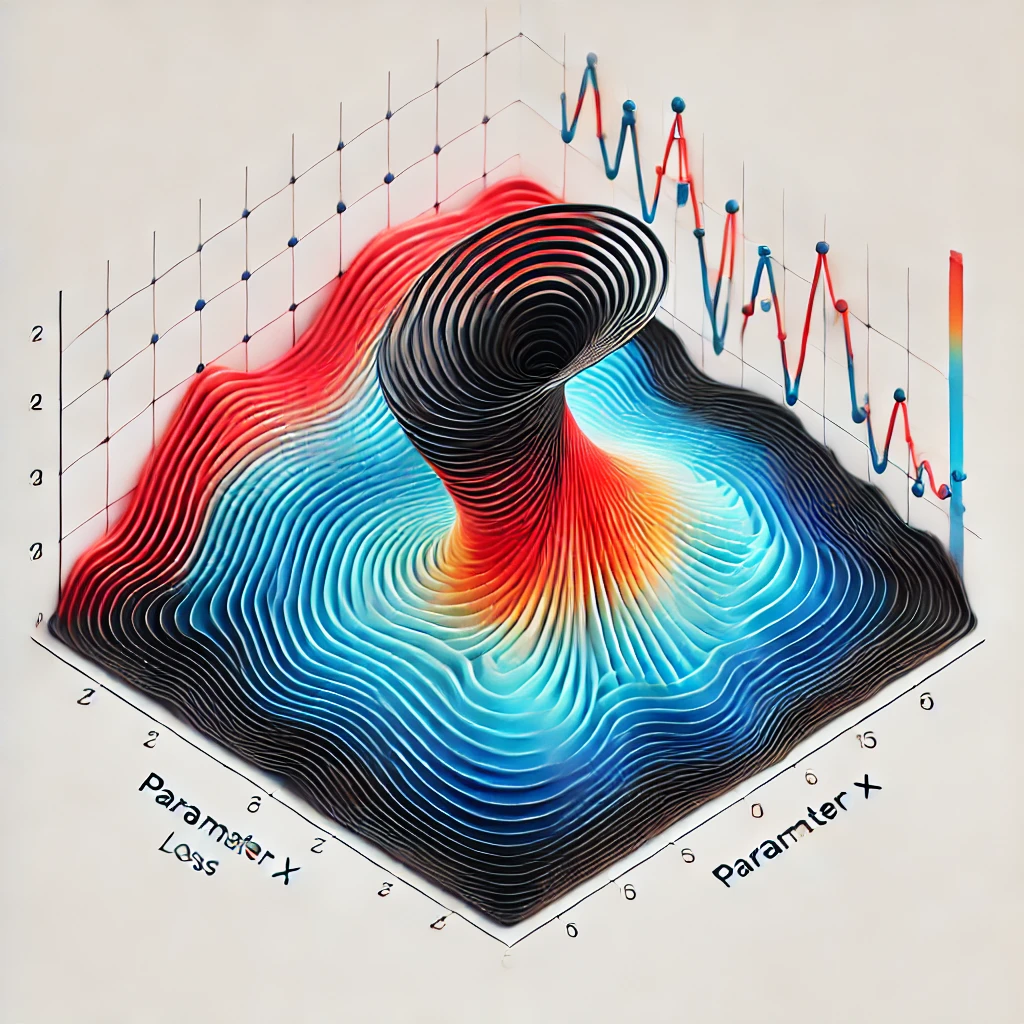

The imperfect picture above is how they represent the training process traditionally. Normally, they represent it as a pyhsical model, in this case, a hill slope. And our training, is like a ball going down the slope. We have to control the movement of the ball to ensure that it reach it's endpoint, which is the lowest minimum point. But, in reality not all hill slope has a smooth curve downward. Sometimes, there's another slope in the middle that may cause our ball to stop and does not reach it's lowest minimum point. The optimizer was supposed to solve this issues. By controlling the momentum of the ball, we will ensure that it will not be stuck in the middle and reach the lowest point. That's why the current optimizer this pyhsical algorithm (momentum etc) to optimize the training process.

This paper propose a paradigm shift eventhough it's not the first in doing so. Instead of a pyhsical model, it envisions the training process as a continous time dynamic system. And since it's time-dynamic we can use feedback control to control the training process. That's where PID comes.

## Let's implement the PIDAO (Proportional Integral Derivative Accelerated Optimizer)

In the PIDAO paper, they recommend that we can control the gradient of training using the PID algorithm. We can just replace the error in the PID to our gradient. Therefore, the PID formula can be modified as below:

The formula for the control input \( u(t) \) in the PIDAO optimizer is:

$$
u(t) = k_p \nabla f(X) + k_i \int_{t_0}^t \nabla f(X(s)) \, ds + k_d \frac{d}{dt} \nabla f(X)
$$

where:
- $ k_p $: Proportional gain (scales the current gradient).
- $ k_i $: Integral gain (accumulates the past gradients).
- $ k_d $: Derivative gain (considers the rate of change of the gradient).

This paper doesn't ask us to completely replace the current methods. It recommends us to combine the traditional physical model optimization (the Adam and classical momentum model) with the PID method. We still assume it as pyhsical, but envisioned it as heavy rolling ball down the slope, and we look it as a dynamic continous movement through the slope. So with that, we need to add our PID to the continous-time heavy-ball dynamics. Therefore the PIDAO framwork can be described as:

$$
\ddot{X} + a \dot{X} + k_p \nabla f(X) + k_i \int_{t_0}^t \nabla f(X(s)) \, ds + k_d \frac{d}{dt} \nabla f(X) = 0
$$

where:
- $ \ddot{X} $: Acceleration term (second derivative of the parameters with respect to time).
- $ \dot{X} $: Velocity term (first derivative of the parameters with respect to time).
- $ a $: Damping coefficient (controls friction-like behavior).


In [1]:
#let's implement this class
import torch
from torch.optim.optimizer import Optimizer

class PIDAO(Optimizer):
    def __init__(self,params, lr=1e-3, kp =1, ki=0.1, kd=0.01, a=0.1):
        """
        PIDAO (Proportional Integral Derivative Accelerated Optimizer

        This optimizer includes PID algorithm on top of classical physical
        model optimizer. Based on the paper by several scientists from
        China

        Args:
        params: Iterable of parameters to optimize
        lr = learning rate
        kp: Proportional gain
        ki = integral gain
        kd: derivative gain
        a: Damping coefficient

        """
        defaults = dict(lr=lr, kp=kp, ki=ki, kd=kd, a=a)
        super(PIDAO,self).__init__(params,defaults)


    @torch.no_grad()
    def step(self,closure = None):
        """
        Performs a single optimization step using PIDAO optimizer for each time this function was called

        Args:
            closure: A closure that re-evaluates the model and return the loss

        """
        #1. update the loss function
        loss = None #initialize the loss
        if closure is not None:
            with torch.enable_grad():
                loss = closure() #update the loss based on the closure

        #2. update the parameters
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue

                grad = p.grad.data
                state = self.state[p]

        #3. state initialization
                if len(state) == 0:
                    state['velocity'] = torch.zeros_like(p.data)
                    state['integral'] = torch.zeros_like(p.data)
                    state['prev_grad'] = torch.zeros_like(p.data)

        #4. retrieve the state variables
                velocity = state['velocity']
                integral = state['integral']
                prev_grad = state['prev_grad']

        #5. get the hyperparameters
                lr = group['lr']
                kp = group['kp']
                ki = group['ki']
                kd = group['kd']
                a = group['a']
                
                
         #6. update all the PID parameters
                integral += grad

                
                derivative = grad - prev_grad

                # PID control update
                update = kp * grad + ki * integral + kd * derivative

                # Velocity update (momentum + damping)
                velocity = a * velocity - lr * update

                # Parameter update
                p.data += velocity

                # Save state
                state['velocity'] = velocity
                state['integral'] = integral
                state['prev_grad'] = grad

        return loss

Epoch 1: PIDAO Loss = 0.6279, Adam Loss = 0.3881
Epoch 2: PIDAO Loss = 0.3858, Adam Loss = 0.2579
Epoch 3: PIDAO Loss = 0.4994, Adam Loss = 0.2320
Epoch 4: PIDAO Loss = 1.0968, Adam Loss = 0.2161
Epoch 5: PIDAO Loss = 2.2717, Adam Loss = 0.2103
Epoch 6: PIDAO Loss = 2.3635, Adam Loss = 0.1997
Epoch 7: PIDAO Loss = 2.3296, Adam Loss = 0.1998
Epoch 8: PIDAO Loss = 2.3182, Adam Loss = 0.1896
Epoch 9: PIDAO Loss = 2.3117, Adam Loss = 0.1865
Epoch 10: PIDAO Loss = 2.3067, Adam Loss = 0.1912


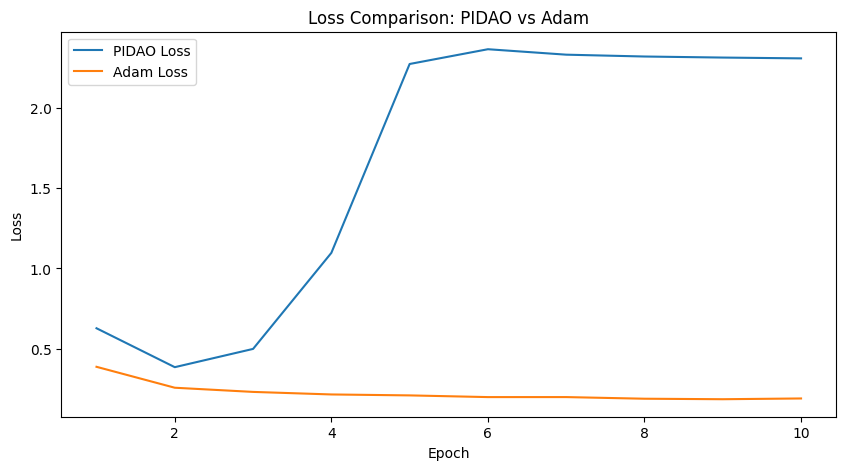

In [2]:
import torch
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


# Simple Neural Network for MNIST
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# MNIST Test Case
if __name__ == "__main__":
    # Transform and DataLoader
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    # Model, Loss, Optimizers
    model_pidao = SimpleNN()
    model_adam = SimpleNN()
    criterion = nn.CrossEntropyLoss()

    optimizer_pidao = PIDAO(model_pidao.parameters(), lr=0.01, kp=1.0, ki=0.1, kd=0.01, a=0.1)
    optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.01)

    # Track Losses
    pidao_losses = []
    adam_losses = []

    # Training Loop
    for epoch in range(10):  # Train for 10 epochs
        model_pidao.train()
        model_adam.train()
        epoch_loss_pidao = 0.0
        epoch_loss_adam = 0.0

        for batch_idx, (data, target) in enumerate(train_loader):
            # PIDAO Optimization
            optimizer_pidao.zero_grad()
            output_pidao = model_pidao(data)
            loss_pidao = criterion(output_pidao, target)
            loss_pidao.backward()
            optimizer_pidao.step()
            epoch_loss_pidao += loss_pidao.item()

            # Adam Optimization
            optimizer_adam.zero_grad()
            output_adam = model_adam(data)
            loss_adam = criterion(output_adam, target)
            loss_adam.backward()
            optimizer_adam.step()
            epoch_loss_adam += loss_adam.item()

        # Store Average Loss for Epoch
        pidao_losses.append(epoch_loss_pidao / len(train_loader))
        adam_losses.append(epoch_loss_adam / len(train_loader))
        print(f"Epoch {epoch + 1}: PIDAO Loss = {pidao_losses[-1]:.4f}, Adam Loss = {adam_losses[-1]:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), pidao_losses, label="PIDAO Loss")
    plt.plot(range(1, 11), adam_losses, label="Adam Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Comparison: PIDAO vs Adam")
    plt.legend()
    plt.show()


Epoch 1: PIDAO Loss = 100.0000, Adam Loss = 100.0000
Epoch 2: PIDAO Loss = 60.5284, Adam Loss = 98.0100
Epoch 3: PIDAO Loss = 31.9320, Adam Loss = 96.0405
Epoch 4: PIDAO Loss = 14.7717, Adam Loss = 94.0920
Epoch 5: PIDAO Loss = 5.5324, Adam Loss = 92.1646
Epoch 6: PIDAO Loss = 1.3065, Adam Loss = 90.2588
Epoch 7: PIDAO Loss = 0.0326, Adam Loss = 88.3748
Epoch 8: PIDAO Loss = 0.3236, Adam Loss = 86.5129
Epoch 9: PIDAO Loss = 1.2909, Adam Loss = 84.6735
Epoch 10: PIDAO Loss = 2.4007, Adam Loss = 82.8568
Epoch 11: PIDAO Loss = 3.3634, Adam Loss = 81.0629
Epoch 12: PIDAO Loss = 4.0492, Adam Loss = 79.2923
Epoch 13: PIDAO Loss = 4.4280, Adam Loss = 77.5450
Epoch 14: PIDAO Loss = 4.5256, Adam Loss = 75.8212
Epoch 15: PIDAO Loss = 4.3952, Adam Loss = 74.1212
Epoch 16: PIDAO Loss = 4.0989, Adam Loss = 72.4451
Epoch 17: PIDAO Loss = 3.6962, Adam Loss = 70.7931
Epoch 18: PIDAO Loss = 3.2383, Adam Loss = 69.1652
Epoch 19: PIDAO Loss = 2.7657, Adam Loss = 67.5615
Epoch 20: PIDAO Loss = 2.3082, Ada

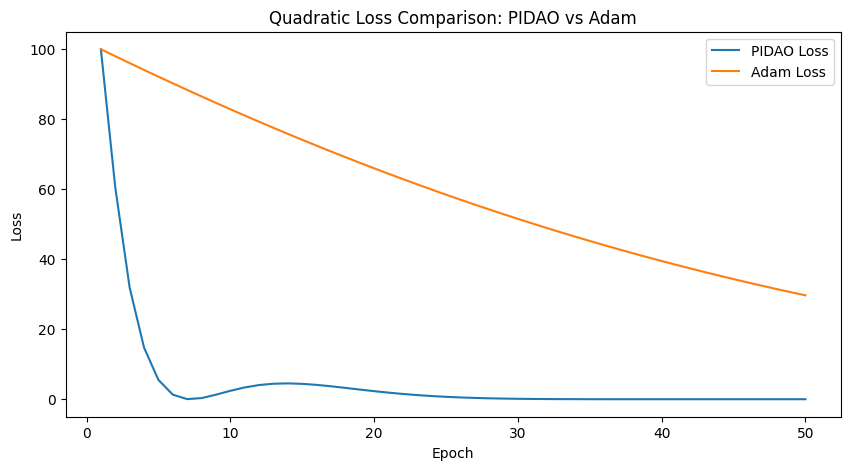

In [3]:
# Quadratic Loss Test
if __name__ == "__main__":
    # Initialize simple parameter
    x_pidao = torch.tensor([10.0], requires_grad=True)
    x_adam = torch.tensor([10.0], requires_grad=True)

    # Define optimizers
    optimizer_pidao = PIDAO([x_pidao], lr=0.1, kp=1.0, ki=0.1, kd=0.01, a=0.1)
    optimizer_adam = torch.optim.Adam([x_adam], lr=0.1)

    # Track losses
    pidao_losses = []
    adam_losses = []

    # Optimization loop
    for epoch in range(50):
        # PIDAO
        optimizer_pidao.zero_grad()
        loss_pidao = x_pidao ** 2  # Quadratic loss
        loss_pidao.backward()
        optimizer_pidao.step()
        pidao_losses.append(loss_pidao.item())

        # Adam
        optimizer_adam.zero_grad()
        loss_adam = x_adam ** 2
        loss_adam.backward()
        optimizer_adam.step()
        adam_losses.append(loss_adam.item())

        print(f"Epoch {epoch + 1}: PIDAO Loss = {pidao_losses[-1]:.4f}, Adam Loss = {adam_losses[-1]:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 51), pidao_losses, label="PIDAO Loss")
    plt.plot(range(1, 51), adam_losses, label="Adam Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Quadratic Loss Comparison: PIDAO vs Adam")
    plt.legend()
    plt.show()


Epoch 1: PIDAO Loss = 6.2639, Adam Loss = 13.4020
Epoch 2: PIDAO Loss = 0.9091, Adam Loss = 1.5372
Epoch 3: PIDAO Loss = 0.8138, Adam Loss = 1.0203
Epoch 4: PIDAO Loss = 0.8104, Adam Loss = 0.8636
Epoch 5: PIDAO Loss = 0.7862, Adam Loss = 0.8455
Epoch 6: PIDAO Loss = 0.7597, Adam Loss = 0.8383
Epoch 7: PIDAO Loss = 0.7473, Adam Loss = 0.8414
Epoch 8: PIDAO Loss = 0.7141, Adam Loss = 0.8380
Epoch 9: PIDAO Loss = 0.8214, Adam Loss = 0.8373
Epoch 10: PIDAO Loss = 0.7325, Adam Loss = 0.8428


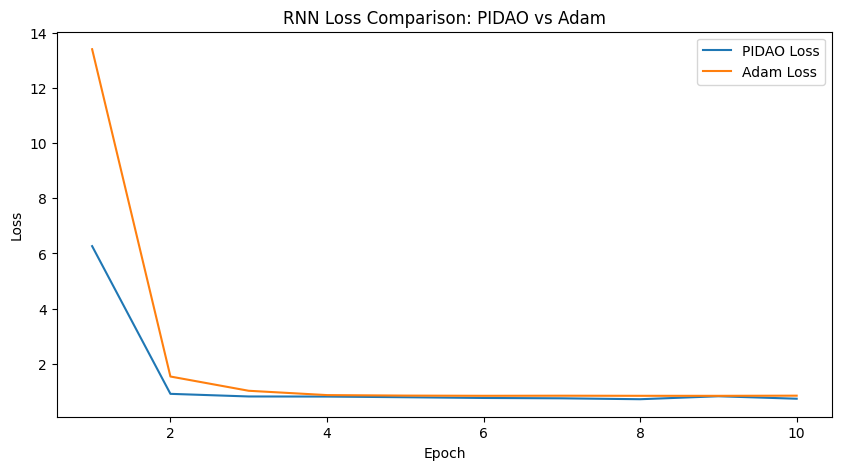

In [4]:
import torch
from torch.optim.optimizer import Optimizer
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F

# Simple RNN for sequence modeling
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take the last output
        return out

# Generate synthetic sequence data
def generate_data(seq_length=10, num_sequences=1000):
    x = torch.rand((num_sequences, seq_length, 1))  # Random sequences
    y = x.sum(dim=1)  # Target is the sum of the sequence
    return x, y

# LSTM/RNN Test Case
if __name__ == "__main__":
    # Generate synthetic data
    seq_length = 10
    num_sequences = 1000
    x, y = generate_data(seq_length, num_sequences)

    # Create DataLoader
    dataset = TensorDataset(x, y)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Define models, criterion, and optimizers
    input_size = 1
    hidden_size = 16
    output_size = 1

    model_pidao = SimpleRNN(input_size, hidden_size, output_size)
    model_adam = SimpleRNN(input_size, hidden_size, output_size)

    criterion = nn.MSELoss()

    optimizer_pidao = PIDAO(model_pidao.parameters(), lr=0.01, kp=1.0, ki=0.1, kd=0.01, a=0.1)
    optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.01)

    # Track losses
    pidao_losses = []
    adam_losses = []

    # Training loop
    for epoch in range(10):
        epoch_loss_pidao = 0.0
        epoch_loss_adam = 0.0

        for batch_idx, (data, target) in enumerate(dataloader):
            # PIDAO Optimization
            optimizer_pidao.zero_grad()
            output_pidao = model_pidao(data)
            loss_pidao = criterion(output_pidao, target)
            loss_pidao.backward()
            optimizer_pidao.step()
            epoch_loss_pidao += loss_pidao.item()

            # Adam Optimization
            optimizer_adam.zero_grad()
            output_adam = model_adam(data)
            loss_adam = criterion(output_adam, target)
            loss_adam.backward()
            optimizer_adam.step()
            epoch_loss_adam += loss_adam.item()

        # Store average loss for epoch
        pidao_losses.append(epoch_loss_pidao / len(dataloader))
        adam_losses.append(epoch_loss_adam / len(dataloader))
        print(f"Epoch {epoch + 1}: PIDAO Loss = {pidao_losses[-1]:.4f}, Adam Loss = {adam_losses[-1]:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), pidao_losses, label="PIDAO Loss")
    plt.plot(range(1, 11), adam_losses, label="Adam Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("RNN Loss Comparison: PIDAO vs Adam")
    plt.legend()
    plt.show()

Epoch 1: PIDAO Loss = 109.8368, Adam Loss = 559.2274
Epoch 2: PIDAO Loss = 5.4660, Adam Loss = 405.5609
Epoch 3: PIDAO Loss = 4.0694, Adam Loss = 295.9492
Epoch 4: PIDAO Loss = 4.0836, Adam Loss = 212.1526
Epoch 5: PIDAO Loss = 4.0474, Adam Loss = 148.6525
Epoch 6: PIDAO Loss = 3.9975, Adam Loss = 102.2676
Epoch 7: PIDAO Loss = 4.0693, Adam Loss = 69.2317
Epoch 8: PIDAO Loss = 4.0463, Adam Loss = 46.0434
Epoch 9: PIDAO Loss = 4.0683, Adam Loss = 30.4160
Epoch 10: PIDAO Loss = 4.0609, Adam Loss = 19.9645
Epoch 11: PIDAO Loss = 4.0684, Adam Loss = 13.4510
Epoch 12: PIDAO Loss = 4.0536, Adam Loss = 9.3885
Epoch 13: PIDAO Loss = 4.0201, Adam Loss = 6.9531
Epoch 14: PIDAO Loss = 4.0944, Adam Loss = 5.6490
Epoch 15: PIDAO Loss = 4.0823, Adam Loss = 4.8760
Epoch 16: PIDAO Loss = 4.0707, Adam Loss = 4.4310
Epoch 17: PIDAO Loss = 4.0809, Adam Loss = 4.2562
Epoch 18: PIDAO Loss = 4.0708, Adam Loss = 4.1453
Epoch 19: PIDAO Loss = 4.0509, Adam Loss = 4.0566
Epoch 20: PIDAO Loss = 4.0780, Adam Loss

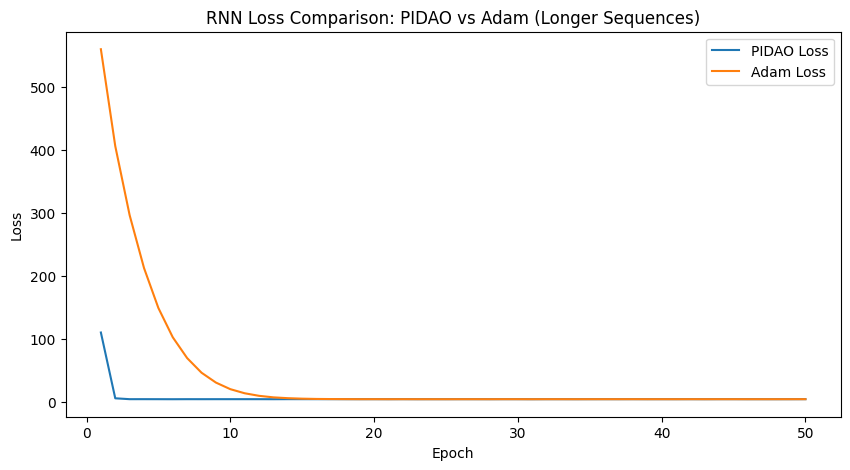

In [5]:
import torch
from torch.optim.optimizer import Optimizer
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F

# Simple RNN for sequence modeling
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take the last output
        return out

# Generate synthetic sequence data
def generate_data(seq_length=50, num_sequences=1000):
    x = torch.rand((num_sequences, seq_length, 1))  # Random sequences
    y = x.sum(dim=1)  # Target is the sum of the sequence
    return x, y

# LSTM/RNN Test Case
if __name__ == "__main__":
    # Generate synthetic data
    seq_length = 50  # Increase sequence length for more challenging task
    num_sequences = 1000
    x, y = generate_data(seq_length, num_sequences)

    # Create DataLoader
    dataset = TensorDataset(x, y)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Define models, criterion, and optimizers
    input_size = 1
    hidden_size = 16
    output_size = 1

    model_pidao = SimpleRNN(input_size, hidden_size, output_size)
    model_adam = SimpleRNN(input_size, hidden_size, output_size)

    criterion = nn.MSELoss()

    optimizer_pidao = PIDAO(model_pidao.parameters(), lr=0.01, kp=1.0, ki=0.1, kd=0.01, a=0.1)
    optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.01)

    # Track losses
    pidao_losses = []
    adam_losses = []

    # Training loop
    for epoch in range(50):
        epoch_loss_pidao = 0.0
        epoch_loss_adam = 0.0

        for batch_idx, (data, target) in enumerate(dataloader):
            # PIDAO Optimization
            optimizer_pidao.zero_grad()
            output_pidao = model_pidao(data)
            loss_pidao = criterion(output_pidao, target)
            loss_pidao.backward()
            optimizer_pidao.step()
            epoch_loss_pidao += loss_pidao.item()

            # Adam Optimization
            optimizer_adam.zero_grad()
            output_adam = model_adam(data)
            loss_adam = criterion(output_adam, target)
            loss_adam.backward()
            optimizer_adam.step()
            epoch_loss_adam += loss_adam.item()

        # Store average loss for epoch
        pidao_losses.append(epoch_loss_pidao / len(dataloader))
        adam_losses.append(epoch_loss_adam / len(dataloader))
        print(f"Epoch {epoch + 1}: PIDAO Loss = {pidao_losses[-1]:.4f}, Adam Loss = {adam_losses[-1]:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 51), pidao_losses, label="PIDAO Loss")
    plt.plot(range(1, 51), adam_losses, label="Adam Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("RNN Loss Comparison: PIDAO vs Adam (Longer Sequences)")
    plt.legend()
    plt.show()

Epoch 1: PIDAO Loss = 0.4897, Adam Loss = 0.7484
Epoch 2: PIDAO Loss = 0.4618, Adam Loss = 0.4642
Epoch 3: PIDAO Loss = 0.4351, Adam Loss = 0.4498
Epoch 4: PIDAO Loss = 0.4030, Adam Loss = 0.4249
Epoch 5: PIDAO Loss = 0.3335, Adam Loss = 0.3783
Epoch 6: PIDAO Loss = 0.3208, Adam Loss = 0.3101
Epoch 7: PIDAO Loss = 0.3302, Adam Loss = 0.2496
Epoch 8: PIDAO Loss = 0.2521, Adam Loss = 0.2191
Epoch 9: PIDAO Loss = 0.2410, Adam Loss = 0.2110
Epoch 10: PIDAO Loss = 0.2206, Adam Loss = 0.2089
Epoch 11: PIDAO Loss = 0.2174, Adam Loss = 0.1746
Epoch 12: PIDAO Loss = 0.2105, Adam Loss = 0.1829
Epoch 13: PIDAO Loss = 0.1875, Adam Loss = 0.1668
Epoch 14: PIDAO Loss = 0.1536, Adam Loss = 0.1415
Epoch 15: PIDAO Loss = 0.1227, Adam Loss = 0.1407
Epoch 16: PIDAO Loss = 0.1107, Adam Loss = 0.1151
Epoch 17: PIDAO Loss = 0.0678, Adam Loss = 0.1074
Epoch 18: PIDAO Loss = 0.1283, Adam Loss = 0.1355
Epoch 19: PIDAO Loss = 0.0643, Adam Loss = 0.1156
Epoch 20: PIDAO Loss = 0.0300, Adam Loss = 0.0992
Epoch 21:

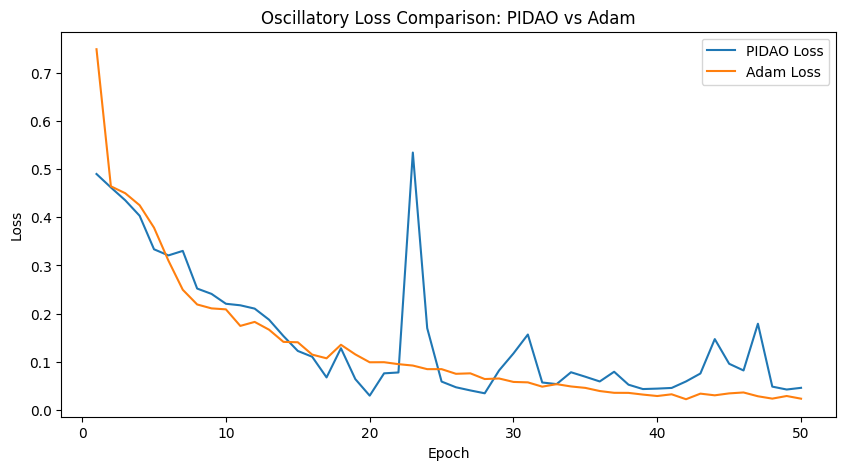

In [6]:
import torch
from torch.optim.optimizer import Optimizer
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import math

# Generate oscillatory loss landscape
def generate_oscillatory_data(num_samples=1000):
    x = torch.linspace(-10, 10, num_samples).view(-1, 1)
    y = torch.sin(x) + 0.1 * torch.randn_like(x)  # Oscillatory target with noise
    return x, y

# Simple Feedforward Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Oscillatory Loss Test Case
if __name__ == "__main__":
    # Generate synthetic oscillatory data
    x, y = generate_oscillatory_data()

    # Create DataLoader
    dataset = TensorDataset(x, y)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    # Define models, criterion, and optimizers
    model_pidao = SimpleNN()
    model_adam = SimpleNN()

    criterion = nn.MSELoss()

    optimizer_pidao = PIDAO(model_pidao.parameters(), lr=0.01, kp=1.0, ki=0.1, kd=0.01, a=0.1)
    optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.01)

    # Track losses
    pidao_losses = []
    adam_losses = []

    # Training loop
    for epoch in range(50):
        epoch_loss_pidao = 0.0
        epoch_loss_adam = 0.0

        for batch_idx, (data, target) in enumerate(dataloader):
            # PIDAO Optimization
            optimizer_pidao.zero_grad()
            output_pidao = model_pidao(data)
            loss_pidao = criterion(output_pidao, target)
            loss_pidao.backward()
            optimizer_pidao.step()
            epoch_loss_pidao += loss_pidao.item()

            # Adam Optimization
            optimizer_adam.zero_grad()
            output_adam = model_adam(data)
            loss_adam = criterion(output_adam, target)
            loss_adam.backward()
            optimizer_adam.step()
            epoch_loss_adam += loss_adam.item()

        # Store average loss for epoch
        pidao_losses.append(epoch_loss_pidao / len(dataloader))
        adam_losses.append(epoch_loss_adam / len(dataloader))
        print(f"Epoch {epoch + 1}: PIDAO Loss = {pidao_losses[-1]:.4f}, Adam Loss = {adam_losses[-1]:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 51), pidao_losses, label="PIDAO Loss")
    plt.plot(range(1, 51), adam_losses, label="Adam Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Oscillatory Loss Comparison: PIDAO vs Adam")
    plt.legend()
    plt.show()


In [17]:
import torch
from torch.optim.optimizer import Optimizer


class EnhancedPIDAO(Optimizer):
    def __init__(self, params, lr=1e-3, kp=1.0, ki=0.1, kd=0.01, a=0.1, c=0.1):
        """
        Enhanced PIDAO Optimizer

        Args:
            params: Iterable of parameters to optimize
            lr: Learning rate
            kp: Proportional gain
            ki: Integral gain
            kd: Derivative gain
            a: Damping coefficient
            c: Velocity coefficient (for enhanced formulation)
        """
        defaults = dict(lr=lr, kp=kp, ki=ki, kd=kd, a=a, c=c)
        super(EnhancedPIDAO, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        """
        Performs a single optimization step using the Enhanced PIDAO optimizer.

        Args:
            closure: A closure that reevaluates the model and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            kp = group['kp']
            ki = group['ki']
            kd = group['kd']
            a = group['a']
            c = group['c']
            lr = group['lr']

            for p in group['params']:
                if p.grad is None:
                    continue

                grad = p.grad.data
                state = self.state[p]

                # Initialize state if not already done
                if 'velocity' not in state:
                    state['velocity'] = torch.zeros_like(p.data)
                    state['integral'] = torch.zeros_like(p.data)
                    state['prev_grad'] = torch.zeros_like(p.data)

                velocity = state['velocity']
                integral = state['integral']
                prev_grad = state['prev_grad']

                # Update integral and derivative terms
                integral += grad
                derivative = grad - prev_grad

                # Enhanced PIDAO Update Rule
                update = kp * grad + ki * integral + kd * derivative
                velocity = a * velocity - lr * update  # Standard PID contribution
                enhanced_update = c * velocity + grad  # Add velocity term for Enhanced PIDAO

                # Parameter update
                p.data -= lr * enhanced_update

                # Save state
                state['velocity'] = velocity
                state['integral'] = integral
                state['prev_grad'] = grad

        return loss


In [21]:
import torch
from torch.optim.optimizer import Optimizer, required


class PIDAccOptimizer_SI_AAdRMS(Optimizer):
    r"""Implements stochastic gradient descent (optionally with momentum).
    Nesterov momentum is based on the formula from
    `On the importance of initialization and momentum in deep learning`__.
    Args:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float): learning rate
        momentum (float, optional): momentum factor (default: 0)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        dampening (float, optional): dampening for momentum (default: 0)
        nesterov (bool, optional): enables Nesterov momentum (default: False)
    Example:
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> optimizer.zero_grad()
        >>> loss_fn(model(input), target).backward()
        >>> optimizer.step()
    __ http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf
    .. note::
        The implementation of SGD with Momentum/Nesterov subtly differs from
        Sutskever et. al. and implementations in some other frameworks.
        Considering the specific case of Momentum, the update can be written as
        .. math::
                  v = \rho * v + g \\
                  p = p - lr * v
        where p, g, v and :math:`\rho` denote the parameters, gradient,
        velocity, and momentum respectively.
        This is in contrast to Sutskever et. al. and
        other frameworks which employ an update of the form
        .. math::
             v = \rho * v + lr * g \\
             p = p - v
        The Nesterov version is analogously modified.
    """

    def __init__(self, params, lr=required, beta1=0.999, beta2=0.9, eps=1e-8, momentum=0.1, dampening=0,
                 weight_decay=0, nesterov=False, kp=5., ki=0.4, kd=8.):
        defaults = dict(lr=lr, momentum=momentum, dampening=dampening, beta1=beta1, beta2=beta2, eps=eps,
                        weight_decay=weight_decay, nesterov=nesterov, kp=kp, ki=ki, kd=kd)
        if nesterov and (momentum <= 0 or dampening != 0):
            raise ValueError("Nesterov momentum requires a momentum and zero dampening")
        super(PIDAccOptimizer_SI_AAdRMS, self).__init__(params, defaults)
        self.k = 1

    def __setstate__(self, state):
        super(PIDAccOptimizer_SI_AAdRMS, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('nesterov', False)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']
            dampening = group['dampening']
            nesterov = group['nesterov']
            lr = group['lr']
            kp = group['kp']
            ki = group['ki']
            kd = group['kd']
            beta1 = group['beta1']
            beta2 = group['beta2']
            eps = group['eps']
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                if weight_decay != 0:
                    d_p.add_(p.data, alpha=weight_decay)
                if momentum != 0:
                    param_state = self.state[p]

                    if 'square_avg' not in param_state:
                        square_avg = param_state['square_avg'] = torch.zeros_like(p.data)
                        square_avg.mul_(beta1).addcmul_(d_p, d_p, value=1 - beta1)
                    else:
                        square_avg = param_state['square_avg']
                        square_avg.mul_(beta1).addcmul_(d_p, d_p.conj(), value=1 - beta1)
                        self.k += 1
                    avg = square_avg.clone().detach().mul_((1 - beta1 ** 2) ** -1).sqrt().add_(eps)

                    if 'z_buffer' not in param_state:
                        z_buf = param_state['z_buffer'] = torch.zeros_like(p.data)
                        z_buf.add_(d_p, alpha=lr)
                    else:
                        z_buf = param_state['z_buffer']
                        z_buf.add_(d_p, alpha=lr)
                    correct_z_buf = z_buf.clone().detach().div_(avg)
                    # correct_z_buf = z_buf.clone().detach()
                    if 'y_buffer' not in param_state:
                        param_state['y_buffer'] = torch.zeros_like(p.data)
                        y_buf = param_state['y_buffer']

                        # y_buf.addcdiv_(d_p, avg, value=-lr * (kp - momentum * kd)).\
                        #     add_(z_buf, alpha=-ki * lr)

                        y_buf.addcdiv_(d_p, avg, value=-lr * (kp - momentum * kd)). \
                            add_(correct_z_buf, alpha=-ki * lr)

                        y_buf.mul_((1 + momentum * lr) ** -1)
                    else:
                        y_buf = param_state['y_buffer']
                        y_buf.addcdiv_(d_p, avg, value=-lr * (kp - momentum * kd)). \
                            add_(correct_z_buf, alpha=-ki * lr)
                        y_buf.mul_((1 + momentum * lr) ** -1)

                    d_p = torch.zeros_like(p.data).add_(y_buf, alpha=lr).addcdiv_(d_p, avg, value=-kd * lr)
                p.data.add_(d_p)

        return loss


Epoch 1: PID Loss = 0.3805, Adam Loss = 0.3868
Epoch 2: PID Loss = 0.1904, Adam Loss = 0.1852
Epoch 3: PID Loss = 0.1474, Adam Loss = 0.1347
Epoch 4: PID Loss = 0.1254, Adam Loss = 0.1077
Epoch 5: PID Loss = 0.1121, Adam Loss = 0.0926
Epoch 6: PID Loss = 0.1002, Adam Loss = 0.0811
Epoch 7: PID Loss = 0.0897, Adam Loss = 0.0734
Epoch 8: PID Loss = 0.0802, Adam Loss = 0.0654
Epoch 9: PID Loss = 0.0719, Adam Loss = 0.0603
Epoch 10: PID Loss = 0.0648, Adam Loss = 0.0536


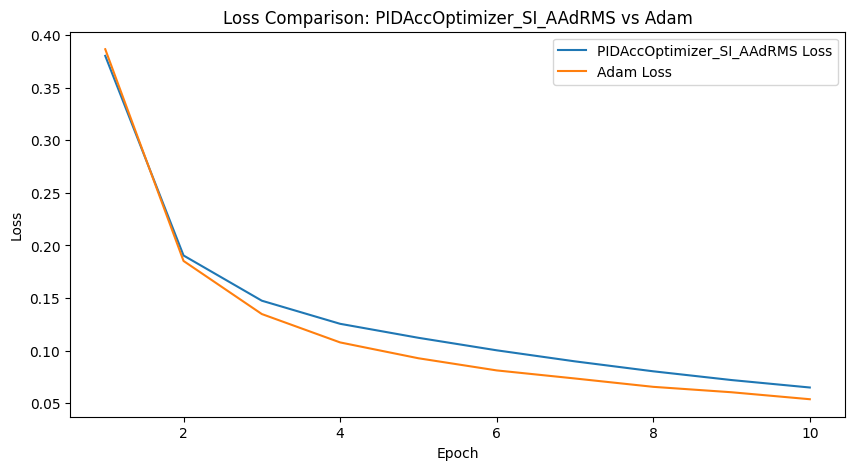

In [24]:
import torch
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the MNIST model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the PIDAccOptimizer_SI_AAdRMS (provided by user)

# Testing PIDAccOptimizer_SI_AAdRMS vs Adam on MNIST
if __name__ == "__main__":
    # MNIST Dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    # Define models, criterion, and optimizers
    model_pid = SimpleNN()
    model_adam = SimpleNN()

    criterion = nn.CrossEntropyLoss()

    optimizer_pid = PIDAccOptimizer_SI_AAdRMS(
        model_pid.parameters(),
        lr=0.001,  # Lower learning rate for stability
        beta1=0.999,
        beta2=0.9,
        eps=1e-8,
        momentum=0.1,
        kp=5.0,
        ki=0.4,
        kd=8.0
    )
    optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.001)

    # Track losses
    pid_losses = []
    adam_losses = []

    # Training loop
    for epoch in range(10):  # Train for 10 epochs
        model_pid.train()
        model_adam.train()
        epoch_loss_pid = 0.0
        epoch_loss_adam = 0.0

        for batch_idx, (data, target) in enumerate(train_loader):
            # PID Optimization
            optimizer_pid.zero_grad()
            output_pid = model_pid(data)
            loss_pid = criterion(output_pid, target)
            loss_pid.backward()
            optimizer_pid.step()
            epoch_loss_pid += loss_pid.item()

            # Adam Optimization
            optimizer_adam.zero_grad()
            output_adam = model_adam(data)
            loss_adam = criterion(output_adam, target)
            loss_adam.backward()
            optimizer_adam.step()
            epoch_loss_adam += loss_adam.item()

        # Store average loss for each epoch
        pid_losses.append(epoch_loss_pid / len(train_loader))
        adam_losses.append(epoch_loss_adam / len(train_loader))
        print(f"Epoch {epoch + 1}: PID Loss = {pid_losses[-1]:.4f}, Adam Loss = {adam_losses[-1]:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), pid_losses, label="PIDAccOptimizer_SI_AAdRMS Loss")
    plt.plot(range(1, 11), adam_losses, label="Adam Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Comparison: PIDAccOptimizer_SI_AAdRMS vs Adam")
    plt.legend()
    plt.show()
